**OBJECTIVE**

To clean and explore data for a non-profit organization focused on promoting and increasing youth literacy rates.
Help stakeholders understand where they should focus their next project and what strategies to use to have the biggest impact in increasing youth literacy rates in that area.



In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np

#Load the data set
file_path = '/content/drive/MyDrive/literacy_rates_updated.xlsx'
lit_rates= pd.read_excel(file_path)
lit_rates.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.321132
3,NaN,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


In [ ]:
#Brief summary of the data set
lit_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3309 non-null   object 
 1   Country        3313 non-null   object 
 2   Year           3313 non-null   object 
 3   Age            3313 non-null   object 
 4   Gender         3313 non-null   object 
 5   Literacy rate  3308 non-null   float64
dtypes: float64(1), object(5)
memory usage: 155.4+ KB


From this preview , we can see that the dataset contains 3,313 rows and 6 columns, there are missing values in Region and Literacy rate columns and the year column is stored as an object instead of an integer.

In [ ]:
#check for total number of missing values for each column
lit_rates.isna().sum()

,0
Region,4
Country,0
Year,0
Age,0
Gender,0
Literacy rate,5


In [ ]:
#check for duplicated rows
duplicated_rows = lit_rates.duplicated()
duplicated_rows.sum()

10

In [ ]:
#Visually check the duplicated rows using the filter
lit_rates[duplicated_rows]


,Region,Country,Year,Age,Gender,Literacy rate
18,Central and Southern Asia,Bangladesh,2011,15-24,female,0.795445
39,Central and Southern Asia,Bangladesh,2013,65+,female,0.153041
167,Central and Southern Asia,Maldives,2014,25-64,male,0.989056
347,Eastern and South-Eastern Asia,China,2010,<15,female,0.927112
513,Eastern and South-Eastern Asia,Singapore,2013,<15,male,0.985425
763,Europe and Northern America,Portugal,2018,25-64,female,0.987342
1158,Latin America and the Caribbean,Colombia,2010,15-24,female,0.985172
1279,Latin America and the Caribbean,Dominican Republic,2016,15-24,female,0.988674
1558,Latin America and the Caribbean,Mexico,2013,<15,female,0.929039
2030,Northern Africa and Western Asia,Egypt,2013,65+,male,0.571875


In [ ]:
#Drop duplicates
lit_rates = lit_rates.drop_duplicates()
lit_rates.duplicated().sum()

0

In [ ]:
len(lit_rates)

3303

In [ ]:
#Use filter to inspect missing values in a Region column
lit_rates[lit_rates['Region'].isna()]


,Region,Country,Year,Age,Gender,Literacy rate
2,NaN,Afghanistan,2011,15-24,female,0.321132
3,NaN,Afghanistan,2011,15-24,male,0.618791
312,NaN,Uzbekistan,2016,65+,female,0.996697
313,NaN,Uzbekistan,2016,65+,male,0.999018


In [ ]:
lit_rates[lit_rates['Literacy rate'].isna()]         # Filter to show all rows that have null values in Literacy rate column

,Region,Country,Year,Age,Gender,Literacy rate
498,Eastern and South-Eastern Asia,Singapore,2010,65+,male,NaN
608,Europe and Northern America,Albania,2012,15-24,female,NaN
753,Europe and Northern America,Portugal,2011,15-24,male,NaN
855,Europe and Northern America,Spain,2010,<15,female,NaN
884,Europe and Northern America,Spain,2013,25-64,male,NaN


Let's handle the missing values by filling in  a placeholder value

In [ ]:
#Fill missing 'Region' with 'Central and Southern Asia'using .loc
lit_rates.loc[lit_rates['Region'].isna(), 'Region'] = 'Central and Southern Asia'
lit_rates['Region'].isna().sum()

0

In [ ]:
#Fill missing 'Literacy rate' with the median value using .loc

lit_rates.loc[lit_rates['Literacy rate'].isna(), 'Literacy rate'] = lit_rates['Literacy rate'].median()
lit_rates['Literacy rate'].isna().sum()





0

In [ ]:
#check data types for each column
lit_rates.dtypes

,0
Region,object
Country,object
Year,object
Age,object
Gender,object
Literacy rate,float64


**Convert Year from string to integer**

In [ ]:
#Check the value_counts for Year
lit_rates['Year'].value_counts()

,count
Year,
2018,574
2011,454
2014,439
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


 The year 2011 contains a non-numerical character (_) , whereby if one entry has a non-numerical character, the whole column will automatically be an object. So we have to remove the character before we convert to int

 We also see the unrealistic year 3014

In [ ]:
#replace 3014 in Year column with 2014
lit_rates.loc[lit_rates['Year'] == 3014, 'Year'] = 2014


In [ ]:
 #remove non-numeric characters

lit_rates["Year"] = lit_rates["Year"].astype(str).str.replace(r"_", "", regex=True)


In [ ]:
#Convert Year from object to int
lit_rates["Year"] = pd.to_numeric(lit_rates["Year"], errors="coerce")

In [ ]:
# Drop rows with NaN (if any non-convertible values exist)
lit_rates = lit_rates.dropna(subset=["Year"])

In [ ]:
#convert to integer
lit_rates["Year"] = lit_rates["Year"].astype(int)

#check data type
lit_rates["Year"].dtype

dtype('int64')

**Identify and address any inconsistencies in categorical values**

In [ ]:
#check for any inconsistences in categorical values using unique and f strings
categorical_columns = ["Region", "Country", "Gender"]
for col in categorical_columns:
    unique_values = lit_rates[col].unique()
    print(f"Unique values in {col}:\n{unique_values}\n")



Unique values in Region:
['Central and Southern Asia' 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']

Unique values in Country:
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'The former Yugoslav Republic of Macedonia' 'Ukraine'
 'Antigua and Barbuda' 'Argenti

In [ ]:
#Address inconsistencies in categorical columns
lit_rates['Gender'] = lit_rates['Gender'].replace({'M': 'Male', 'F': 'Female'})   #Gender
print(lit_rates['Gender'].unique())

lit_rates['Region'] = lit_rates['Region'].replace({'Africa': 'Africa Region'})   #Region
print(lit_rates['Region'].unique())

lit_rates['Country'] = lit_rates['Country'].str.strip()                          #Remove extra spaces and special characters in Country
print(lit_rates['Country'].unique())

['female' 'male' 'Female' 'Male']
['Central and Southern Asia' 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'The former Yugoslav Republic of Macedonia' 'Ukraine'
 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Barba

**Identify and address any inappropriate or unusual data points.**

In [ ]:
#check for unusual data point in data set
lit_rates.describe()


,Year,Literacy rate
count,3303.000000,3303.000000
mean,2013.988193,0.817477
std,2.746317,0.234910
min,2010.000000,0.004025
25%,2011.000000,0.726998
50%,2014.000000,0.929605
75%,2016.000000,0.985461
max,2018.000000,1.000000


In [ ]:
#round off literacy rate to 2 decimals
lit_rates['Literacy rate'] = lit_rates['Literacy rate'].round(2)
lit_rates.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.18
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.45
2,Central and Southern Asia,Afghanistan,2011,15-24,female,0.32
3,Central and Southern Asia,Afghanistan,2011,15-24,male,0.62
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.08


In [ ]:
#convert literacy rate to percentage
lit_rates['Literacy rate'] = lit_rates['Literacy rate'] * 100
lit_rates.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,18.0
1,Central and Southern Asia,Afghanistan,2011,<15,male,45.0
2,Central and Southern Asia,Afghanistan,2011,15-24,female,32.0
3,Central and Southern Asia,Afghanistan,2011,15-24,male,62.0
4,Central and Southern Asia,Afghanistan,2011,25-64,female,8.0


In [ ]:
print(lit_rates.isnull().sum())

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64


In [ ]:
lit_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


**DATA** **VISUALIZATION**

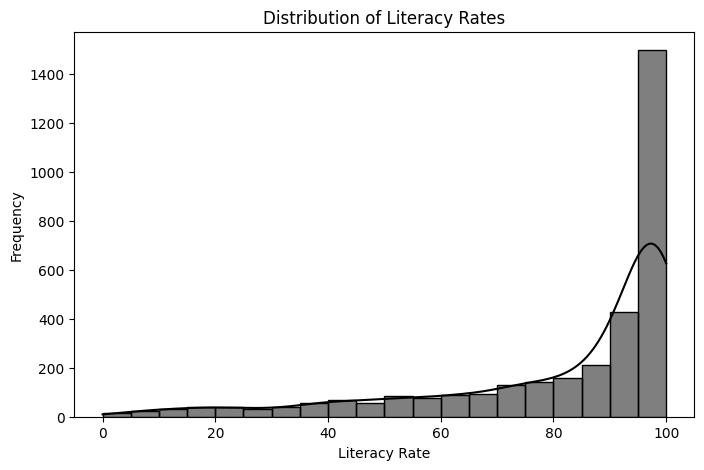

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate exploratory visualization

#Histogram of Literacy rate
plt.figure(figsize=(8, 5))
sns.histplot(lit_rates['Literacy rate'], bins=20, kde=True, color='black')
plt.title('Distribution of Literacy Rates')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')
plt.show()


**Interpretation**
The histogram shows  the overall distribution of literacy rates across different countries. It appears that most literacy rates are concentrated around higher values , indicating that most countries have relatively high literacy rates .
The peak  tells us the most common literacy rate range.
The spread reveals how much variation exists among different countries

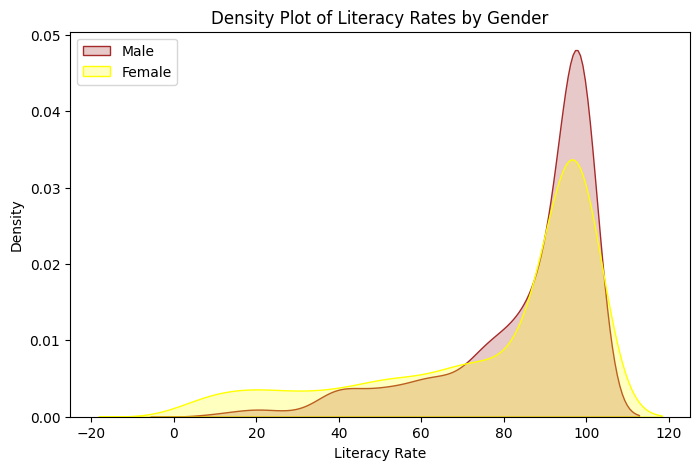

In [ ]:
# Univariate Visualization 2: density plot of Literacy Rates by gender

# Filter the data for literacy rates by gender
male_data = lit_rates[lit_rates['Gender'] == 'male']['Literacy rate']
female_data = lit_rates[lit_rates['Gender'] == 'female']['Literacy rate']

#density plot
plt.figure(figsize=(8, 5))
sns.kdeplot(male_data, fill=True, color='brown', label='Male')
sns.kdeplot(female_data, fill=True, color='yellow', label='Female')
plt.title('Density Plot of Literacy Rates by Gender')
plt.xlabel('Literacy Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

The density plot show two smoothed curves, one for males and one for females, representing the distribution of literacy rates for each gender.

If the two curves significantly overlap, it indicates similar literacy rates for both genders.

The male literacy rate is consistently higher than the female, which suggests gender disparity in education.

Wider curves indicate more variation in literacy rates within that gender group.

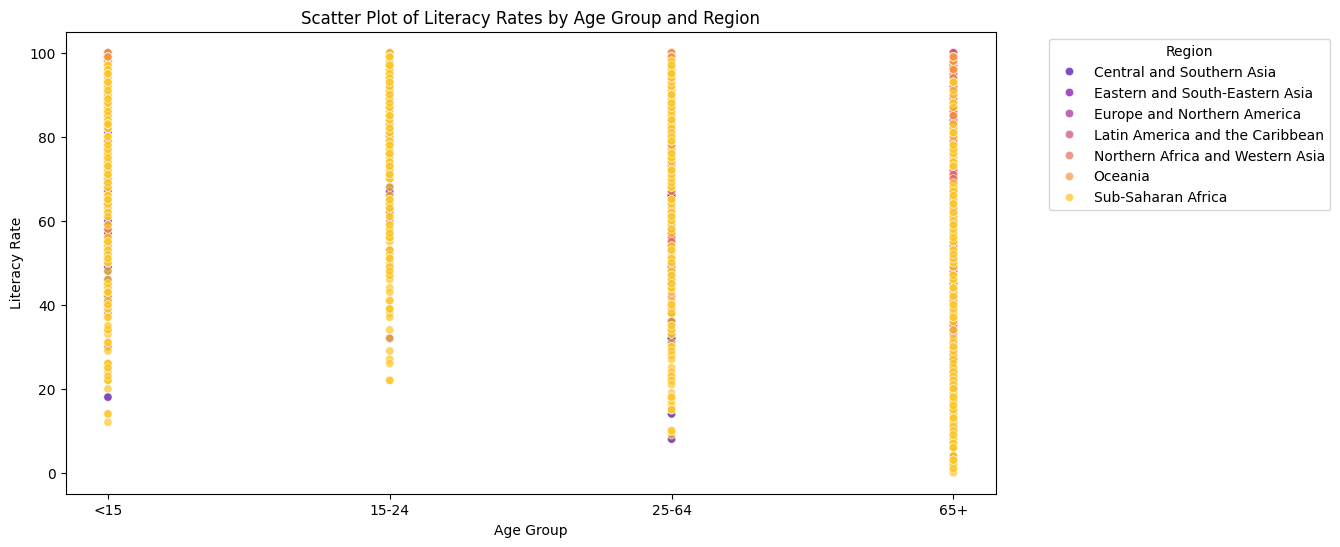

In [ ]:
# Multivariate Exploratory Visualizations


# 1. Scatter Plot of Literacy Rates by Age Group and Region
plt.figure(figsize=(12, 6))
sns.scatterplot(data =lit_rates, x='Age', y='Literacy rate', hue='Region', palette='plasma', alpha = 0.7)
plt.title('Scatter Plot of Literacy Rates by Age Group and Region')
plt.xlabel('Age Group')
plt.ylabel('Literacy Rate')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The scatter plot shows literacy rates across different age groups and regions.
It appears that younger age groups (e.g., <15 and 15-24) tend to have higher literacy rates compared to older age groups (e.g., 25-64 and 65+).
Additionally, certain regions may have consistently higher or lower literacy rates across age groups e.g Sub-Saharan region has the lowest literacy rate with the highest age group

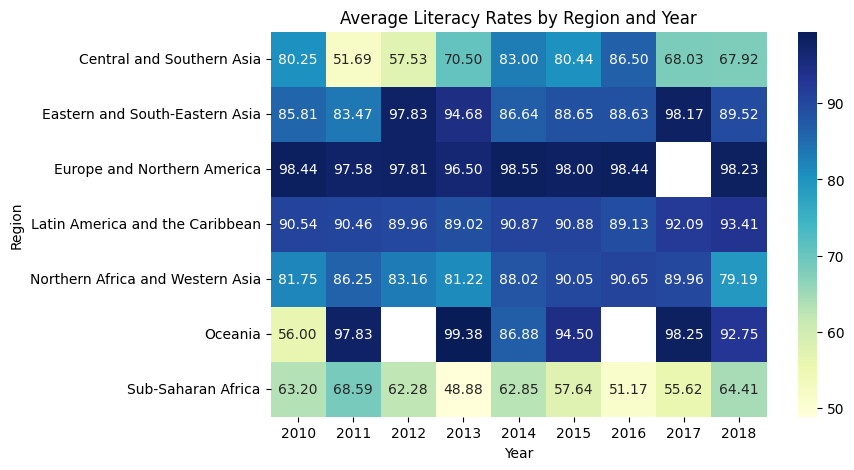

In [ ]:
#2. Heatmap of Literacy Rates by Region and Year
# Pivot the data to create a heatmap
pivot_data = lit_rates.pivot_table(index='Region', columns='Year', values='Literacy rate', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Literacy Rates by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

The heatmap displays the average literacy rates across different regions and years.

It allows us to identify regions that have consistently low literacy rates over time, which could be potential targets for the non-profit's next project.

Additionally, it shows trends in literacy rates over the years, which can help in understanding the impact of past initiatives.

Forexample , We see that from 2010-2018 , Sub-saharan Africa had the lowest literacy rate compared to Europe and North America with the highest Literacy rate

**CONCLUSION**

Based on the visualizations, the non-profit organization should consider focusing on regions with consistently low literacy rates,such as Sub- Saharan Africa , Oceania, particularly among younger age groups.

Additionally, strategies should be tailored to address gender disparities, as males tend to have slightly higher literacy rates than females forexample supporting girl child education through bursaries , scholarships or universal free education for the females.